# 1) Preparación previa

#### Carga de librerías

In [121]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

#### Lectura del dataset

Se decidió utilizar unos datos históricos de criptomonedas. El tema nos interesó no solo por estar más vigente que nunca, sino porque nos resultó excelente para explayar diversas herramientas aprendidas en el curso.

In [122]:
df_bitcoin = pd.read_csv('coin_Bitcoin.csv')
df_aave = pd.read_csv('coin_Aave.csv')
df_binancecoin = pd.read_csv('coin_BinanceCoin.csv')
df_cardano = pd.read_csv('coin_Cardano.csv')
df_chainlink = pd.read_csv('coin_ChainLink.csv')
df_cosmos = pd.read_csv('coin_Cosmos.csv')
df_cryptocomcoin = pd.read_csv('coin_CryptocomCoin.csv')
df_dogecoin = pd.read_csv('coin_Dogecoin.csv')
df_eos = pd.read_csv('coin_EOS.csv')
df_ethereum = pd.read_csv('coin_Ethereum.csv')
df_iota = pd.read_csv('coin_Iota.csv')
df_litecoin = pd.read_csv('coin_Litecoin.csv')
df_monero = pd.read_csv('coin_Monero.csv')
df_nem = pd.read_csv('coin_NEM.csv')
df_polkadot = pd.read_csv('coin_Polkadot.csv')
df_solana = pd.read_csv('coin_Solana.csv')
df_stellar = pd.read_csv('coin_Stellar.csv')
df_tether = pd.read_csv('coin_Tether.csv')
df_tron = pd.read_csv('coin_Tron.csv')
df_uniswap = pd.read_csv('coin_Uniswap.csv')
df_usdcoin = pd.read_csv('coin_USDCoin.csv')
df_wrappedbitcoin = pd.read_csv('coin_WrappedBitcoin.csv')
df_xrp = pd.read_csv('coin_XRP.csv')

#### Vista general

Se corren varias funciones para obtener un resumen general de los datasets, eligiendo uno (bitcoin) como ejemplo para analizar la estructura e información de todos, ya que son iguales

In [123]:
df_bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599999,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23,54204.929760,45290.590270,54204.929760,48824.426870,1.061020e+11,9.099260e+11
2858,2859,Bitcoin,BTC,2021-02-24,51290.136690,47213.498160,48835.087660,49705.333320,6.369552e+10,9.263930e+11
2859,2860,Bitcoin,BTC,2021-02-25,51948.966980,47093.853020,49709.082420,47093.853020,5.450657e+10,8.777660e+11
2860,2861,Bitcoin,BTC,2021-02-26,48370.785260,44454.842110,47180.464050,46339.760080,3.509680e+11,8.637520e+11


Se observan los tipos de datos que conforman el dataset

In [124]:
df_bitcoin.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

Se chequea la existencia de valores nulos 

In [125]:
df_bitcoin.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

#### Unificación de los datasets

Se utiliza un for loop para crear un dataframe que preserve los datos de cada dataset que nos conciernen 

In [126]:
# Se crea una tupla para la iteración de los datasets en el for loop
lista_cryptos = [df_aave, df_binancecoin, df_bitcoin, df_cardano, df_chainlink, df_cosmos, df_cryptocomcoin, df_dogecoin, df_eos, df_ethereum, df_iota, df_litecoin, df_monero,
                 df_nem, df_polkadot, df_solana, df_stellar, df_tether, df_tron, df_uniswap, df_usdcoin, df_wrappedbitcoin, df_xrp]

# Se crea un dataframe vacío para aplicarle el append al final del loop
cryptos = pd.DataFrame()

# Además de obtener las columnas que importan, se crea la columna "Volatilidad"
for dataframe in lista_cryptos:
    variaciones = dataframe.Close.pct_change()
    volatilidad_diaria = np.sqrt(np.abs(variaciones))
    dataframe["Volatilidad"] = volatilidad_diaria
    df_temp = dataframe[['Date','Symbol', 'Close', 'Marketcap','Volatilidad']]
    cryptos = cryptos.append(df_temp)

cryptos.set_index(['Date','Symbol'])

# La volatilidad generan NaNs por no poder contrastar los primeros valores históricos de cada moneda con una fecha anterior sin valores
cryptos = cryptos.replace(np.nan, 0)
cryptos

,Date,Symbol,Close,Marketcap,Volatilidad
0,2020-10-05 23:59:59,AAVE,53.219243,8.912813e+07,0.000000
1,2020-10-06 23:59:59,AAVE,42.401599,7.101144e+07,0.450850
2,2020-10-07 23:59:59,AAVE,40.083976,6.713004e+07,0.233792
3,2020-10-08 23:59:59,AAVE,43.764463,2.202651e+08,0.303017
4,2020-10-09 23:59:59,AAVE,46.817744,2.356322e+08,0.264133
...,...,...,...,...,...
2759,2021-02-23 23:59:59,XRP,0.473563,2.150165e+10,0.414389
2760,2021-02-24 23:59:59,XRP,0.471832,2.142305e+10,0.060460
2761,2021-02-25 23:59:59,XRP,0.434524,1.972912e+10,0.281195
2762,2021-02-26 23:59:59,XRP,0.427900,1.942839e+10,0.123462


#### Tratamiento de la columna Date

Se pasa la columna Date al formato datetime. A su vez, se crea la columna Year para análisis anual y se le quita la hora a la columna Date

In [127]:
cryptos['Date'] = pd.to_datetime(cryptos['Date'])
cryptos['Year'] = cryptos['Date'].dt.year
cryptos['Date'] = pd.to_datetime(cryptos['Date']).dt.date

In [128]:
cryptos

,Date,Symbol,Close,Marketcap,Volatilidad,Year
0,2020-10-05,AAVE,53.219243,8.912813e+07,0.000000,2020
1,2020-10-06,AAVE,42.401599,7.101144e+07,0.450850,2020
2,2020-10-07,AAVE,40.083976,6.713004e+07,0.233792,2020
3,2020-10-08,AAVE,43.764463,2.202651e+08,0.303017,2020
4,2020-10-09,AAVE,46.817744,2.356322e+08,0.264133,2020
...,...,...,...,...,...,...
2759,2021-02-23,XRP,0.473563,2.150165e+10,0.414389,2021
2760,2021-02-24,XRP,0.471832,2.142305e+10,0.060460,2021
2761,2021-02-25,XRP,0.434524,1.972912e+10,0.281195,2021
2762,2021-02-26,XRP,0.427900,1.942839e+10,0.123462,2021


# 2) Análisis exploratorio

## Clustering

#### Introducción

Se pretende encontrar puntos en común entre las distintas criptomonedas, tomando como variables el Marketcap y la Volatilidad a lo largo de su historia. Intuitivamente, se puede pensar que las monedas irán cambiando de cluster a lo largo de los años, y las más recientes serán de mayor volatilidad y menor marketcap. Ahí radica la importancia de la variable Year en el análisis que se desarrollará

In [129]:
# Se eligen las variables a analizar y se estandariza

X = cryptos[['Marketcap','Volatilidad']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X);

La comparación de puntajes en Silhouette score y en Calinski-Harabasz es fundamental previo a la aplicación del modelo de clustering, para definir K en Kmeans

#### Silhouette Score:

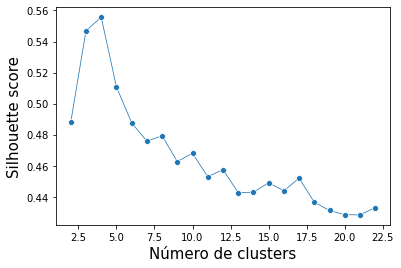

In [17]:
sil=[]
k_values = range(2,23);

for k in k_values:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score', fontsize = 15);
plt.xlabel('Número de clusters', fontsize = 15);

In [18]:
print("La cantidad de clusters que optimizan el Silhouette Score es:", np.argmax(sil) + 2) # Se suma 2 al índice que dio el valor máximo pues el mínimo del rango a analizar era 2.

La cantidad de clusters que optimizan el Silhouette Score es: 4


#### Calinski-Harabasz:

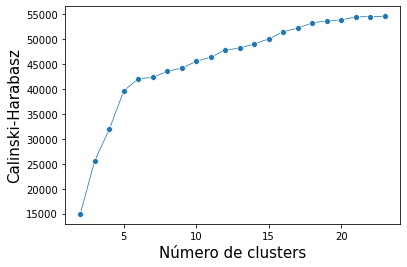

In [19]:
k_values = range(2,24);
ch_scores = []

for k in k_values:
    
    kmeans = KMeans(n_clusters= k , n_init = 10, random_state=0)
    kmeans.fit(X_scaled)
    score = calinski_harabasz_score(X_scaled,kmeans.labels_)
    ch_scores.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

In [20]:
print("La cantidad de clusters que optimizan el puntaje de Calinski-Harabasz es:", np.argmax(ch_scores) + 2) # Se suma 2 al índice que dio el valor máximo pues el mínimo del rango a analizar era 2.

La cantidad de clusters que optimizan el puntaje de Calinski-Harabasz es: 23


Debido a la falta de lógica en el resultado de Calinski-Harabasz, se decide proceder con el resultado del Silhouette Score: 4 clusters

#### KMeans

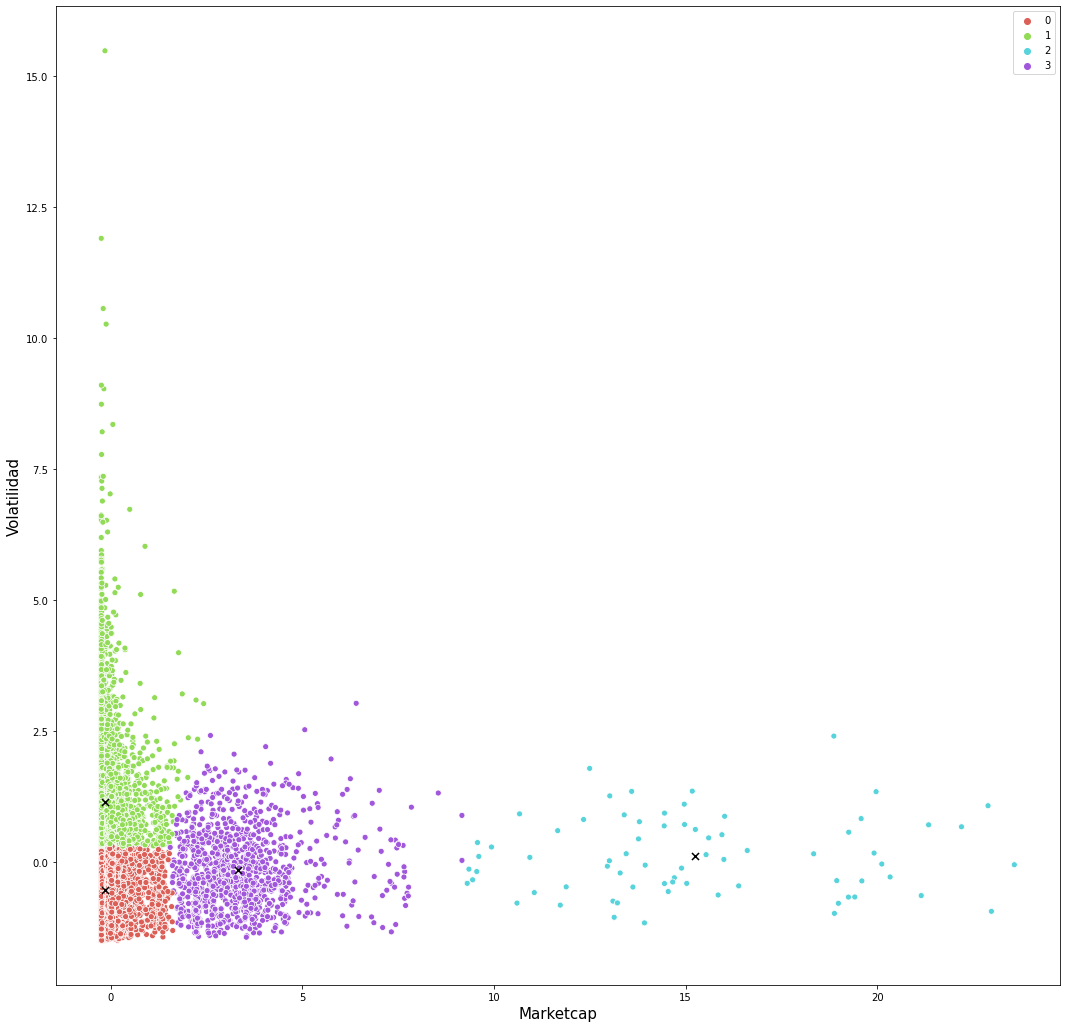

In [11]:
kmeans = KMeans(n_clusters = 4, n_init=10, random_state = 0)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_ 
color_palette= sns.color_palette("hls", 4)
plt.figure(figsize = (18,18));
sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full', palette= color_palette);
plt.xlabel('Marketcap',fontsize=15);plt.ylabel('Volatilidad',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

plt.savefig("KMeans.png")

En el análisis financiero de las criptomonedas, hay una cierta continuidad en el desarrollo de las mismas: si son exitosas van aumentando su Marketcap, perdiendo volatilidad. En ese sentido, tiene lógica que el cluster 0 sea el más volátil y de menor marketcap, mientras que el 3 sea de menor volatilidad y mayor marketcap y así representar de manera ascendente el desarrollo histórico de las criptomonedas. Por lo susodicho, se alterarán los labels de Kmeans: el cluster 3 debería ser el 2 (y viceversa) y el cluster 1 debería ser el 0 (y viceversa) para representar la siguiente lógica:

Cluster 0: alta volatilidad + bajo marketcap

Cluster 1: baja volatilidad + bajo marketcap

Cluster 2: baja volatilidad + mediano marketcap

Cluster 3: baja volatilidad + alto marketcap

In [12]:
X_clustered = kmeans.predict(X_scaled)
cryptos["Cluster_inicial"] = X_clustered
cryptos["Cluster1"] = cryptos["Cluster_inicial"].apply(lambda x : 1 if x == 0 else 0)
cryptos["Cluster0"] = cryptos["Cluster_inicial"].apply(lambda x : 0 if x == 1 else 0)
cryptos["Cluster2"] = cryptos["Cluster_inicial"].apply(lambda x : 3 if x == 2 else 0)
cryptos["Cluster3"] = cryptos["Cluster_inicial"].apply(lambda x : 2 if x == 3 else 0)
cryptos["Cluster"] = cryptos["Cluster0"] + cryptos["Cluster1"] + cryptos["Cluster2"] + cryptos["Cluster3"]
cryptos.drop(["Cluster_inicial", "Cluster0", "Cluster1", "Cluster2", "Cluster3"], axis = 1, inplace = True)
cryptos

,Date,Symbol,Close,Marketcap,Volatilidad,Year,Cluster
0,2020-10-05,AAVE,53.219243,8.912813e+07,0.000000,2020,1
1,2020-10-06,AAVE,42.401599,7.101144e+07,0.450850,2020,0
2,2020-10-07,AAVE,40.083976,6.713004e+07,0.233792,2020,0
3,2020-10-08,AAVE,43.764463,2.202651e+08,0.303017,2020,0
4,2020-10-09,AAVE,46.817744,2.356322e+08,0.264133,2020,0
...,...,...,...,...,...,...,...
2759,2021-02-23,XRP,0.473563,2.150165e+10,0.414389,2021,0
2760,2021-02-24,XRP,0.471832,2.142305e+10,0.060460,2021,1
2761,2021-02-25,XRP,0.434524,1.972912e+10,0.281195,2021,0
2762,2021-02-26,XRP,0.427900,1.942839e+10,0.123462,2021,1


#### Análisis anual

In [13]:
years = pd.Series(cryptos.Year.unique()).sort_values()

for year in years:
    print(year)
    print(cryptos[cryptos["Year"] == year].Cluster.value_counts(normalize = True))

2013
1    0.575114
0    0.424886
Name: Cluster, dtype: float64
2014
1    0.637903
0    0.362097
Name: Cluster, dtype: float64
2015
1    0.725806
0    0.274194
Name: Cluster, dtype: float64
2016
1    0.779296
0    0.220704
Name: Cluster, dtype: float64
2017
1    0.546005
0    0.433898
2    0.020097
Name: Cluster, dtype: float64
2018
1    0.551650
0    0.381277
2    0.067073
Name: Cluster, dtype: float64
2019
1    0.733460
0    0.226581
2    0.039959
Name: Cluster, dtype: float64
2020
1    0.681643
0    0.269980
2    0.046653
3    0.001723
Name: Cluster, dtype: float64
2021
1    0.464018
0    0.450525
3    0.043478
2    0.041979
Name: Cluster, dtype: float64


Como se ve, a lo largo de los años hay una transición desde clusters inferiores a superiores. Se entiende que los clustes inferiores no desaparecen porque van surgiendo nuevas criptomonedas

#### Análisis de cada criptomoneda

In [14]:
symbols = pd.Series(cryptos.Symbol.unique())

for symbol in symbols:
    print(symbol)
    print(cryptos[cryptos.Symbol == symbol].Cluster.value_counts(normalize = True))

AAVE
0    0.657534
1    0.342466
Name: Cluster, dtype: float64
BNB
1    0.643564
0    0.356436
Name: Cluster, dtype: float64
BTC
1    0.492662
2    0.358491
0    0.124039
3    0.024808
Name: Cluster, dtype: float64
ADA
1    0.598394
0    0.401606
Name: Cluster, dtype: float64
LINK
1    0.522293
0    0.477707
Name: Cluster, dtype: float64
ATOM
1    0.585196
0    0.414804
Name: Cluster, dtype: float64
CRO
1    0.692308
0    0.307692
Name: Cluster, dtype: float64
DOGE
1    0.690992
0    0.309008
Name: Cluster, dtype: float64
EOS
1    0.629768
0    0.370232
Name: Cluster, dtype: float64
ETH
1    0.631709
0    0.317085
2    0.051206
Name: Cluster, dtype: float64
MIOTA
1    0.584502
0    0.415498
Name: Cluster, dtype: float64
LTC
1    0.705451
0    0.294549
Name: Cluster, dtype: float64
XMR
1    0.598868
0    0.401132
Name: Cluster, dtype: float64
XEM
1    0.588235
0    0.411765
Name: Cluster, dtype: float64
DOT
1    0.528796
0    0.471204
Name: Cluster, dtype: float64
SOL
0    0.588235
1   

Como se ve, las altcoins más recientes o derivadas de blockhains principales pertenecen al cluster 0, las altcoins mejor asentadas quedan en el cluster 1 y las criptomonedas con diferentes blockhains llegan al cluster 2 (Ethereum, Ripple), mientras que solo Bitcoin llega al 2do y 3er cluster.

#### Análisis de cada moneda en 2021

In [15]:
for symbol in symbols:
    print(symbol)
    crypto_symbol = cryptos[cryptos.Symbol == symbol]
    print(crypto_symbol[crypto_symbol.Year == 2021].Cluster.value_counts(normalize = True))

AAVE
0    0.655172
1    0.344828
Name: Cluster, dtype: float64
BNB
0    0.534483
1    0.465517
Name: Cluster, dtype: float64
BTC
3    1.0
Name: Cluster, dtype: float64
ADA
0    0.517241
1    0.482759
Name: Cluster, dtype: float64
LINK
0    0.62069
1    0.37931
Name: Cluster, dtype: float64
ATOM
0    0.603448
1    0.396552
Name: Cluster, dtype: float64
CRO
1    0.534483
0    0.465517
Name: Cluster, dtype: float64
DOGE
0    0.637931
1    0.362069
Name: Cluster, dtype: float64
EOS
1    0.551724
0    0.448276
Name: Cluster, dtype: float64
ETH
2    0.965517
1    0.017241
0    0.017241
Name: Cluster, dtype: float64
MIOTA
1    0.5
0    0.5
Name: Cluster, dtype: float64
LTC
1    0.534483
0    0.465517
Name: Cluster, dtype: float64
XMR
1    0.551724
0    0.448276
Name: Cluster, dtype: float64
XEM
1    0.5
0    0.5
Name: Cluster, dtype: float64
DOT
0    0.62069
1    0.37931
Name: Cluster, dtype: float64
SOL
0    0.655172
1    0.344828
Name: Cluster, dtype: float64
XLM
0    0.568966
1    0.431034

Este resultado refuerza lo concluido anteriormente: BTC ya se asentó en el cluster 3 por su larga historia, ETH se asentó en el cluster 2 por ser la segunda blockchain en ser creada (el resto derivan de BTC), mientras que las altcoins varían entre los primeros dos clusters según su historia.

# 3) Visualización

#### Elección de criptomonedas

Se eligirán 4 criptomonedas para analizar. Cada una perteneció con mayor proporción de días del año 2021 al cluster que ejemplificará:

In [16]:
print("Cluster 0: DOGE (", (cryptos[(cryptos.Year == 2021) & (cryptos.Symbol == "DOGE")].Cluster.value_counts(normalize = True).max() * 100).round(), "% de los días del año )")
print("Cluster 1: LTC (", (cryptos[(cryptos.Year == 2021) & (cryptos.Symbol == "LTC")].Cluster.value_counts(normalize = True).max() * 100).round(), "% de los días del año )")
print("Cluster 2: ETH (", (cryptos[(cryptos.Year == 2021) & (cryptos.Symbol == "ETH")].Cluster.value_counts(normalize = True).max() * 100).round(), "% de los días del año )")
print("Cluster 3: BTC (", (cryptos[(cryptos.Year == 2021) & (cryptos.Symbol == "BTC")].Cluster.value_counts(normalize = True).max() * 100).round(), "% de los días del año )")

Cluster 0: DOGE ( 64.0 % de los días del año )
Cluster 1: LTC ( 53.0 % de los días del año )
Cluster 2: ETH ( 97.0 % de los días del año )
Cluster 3: BTC ( 100.0 % de los días del año )


#### Boxplots para visualizar la tendencia anual y la estacionalidad mensual

El análisis es individual por cada moneda, así que no se unifican las escalas: traería problemas de visualización en las monedas de menor valor y aportaría poco al análisis

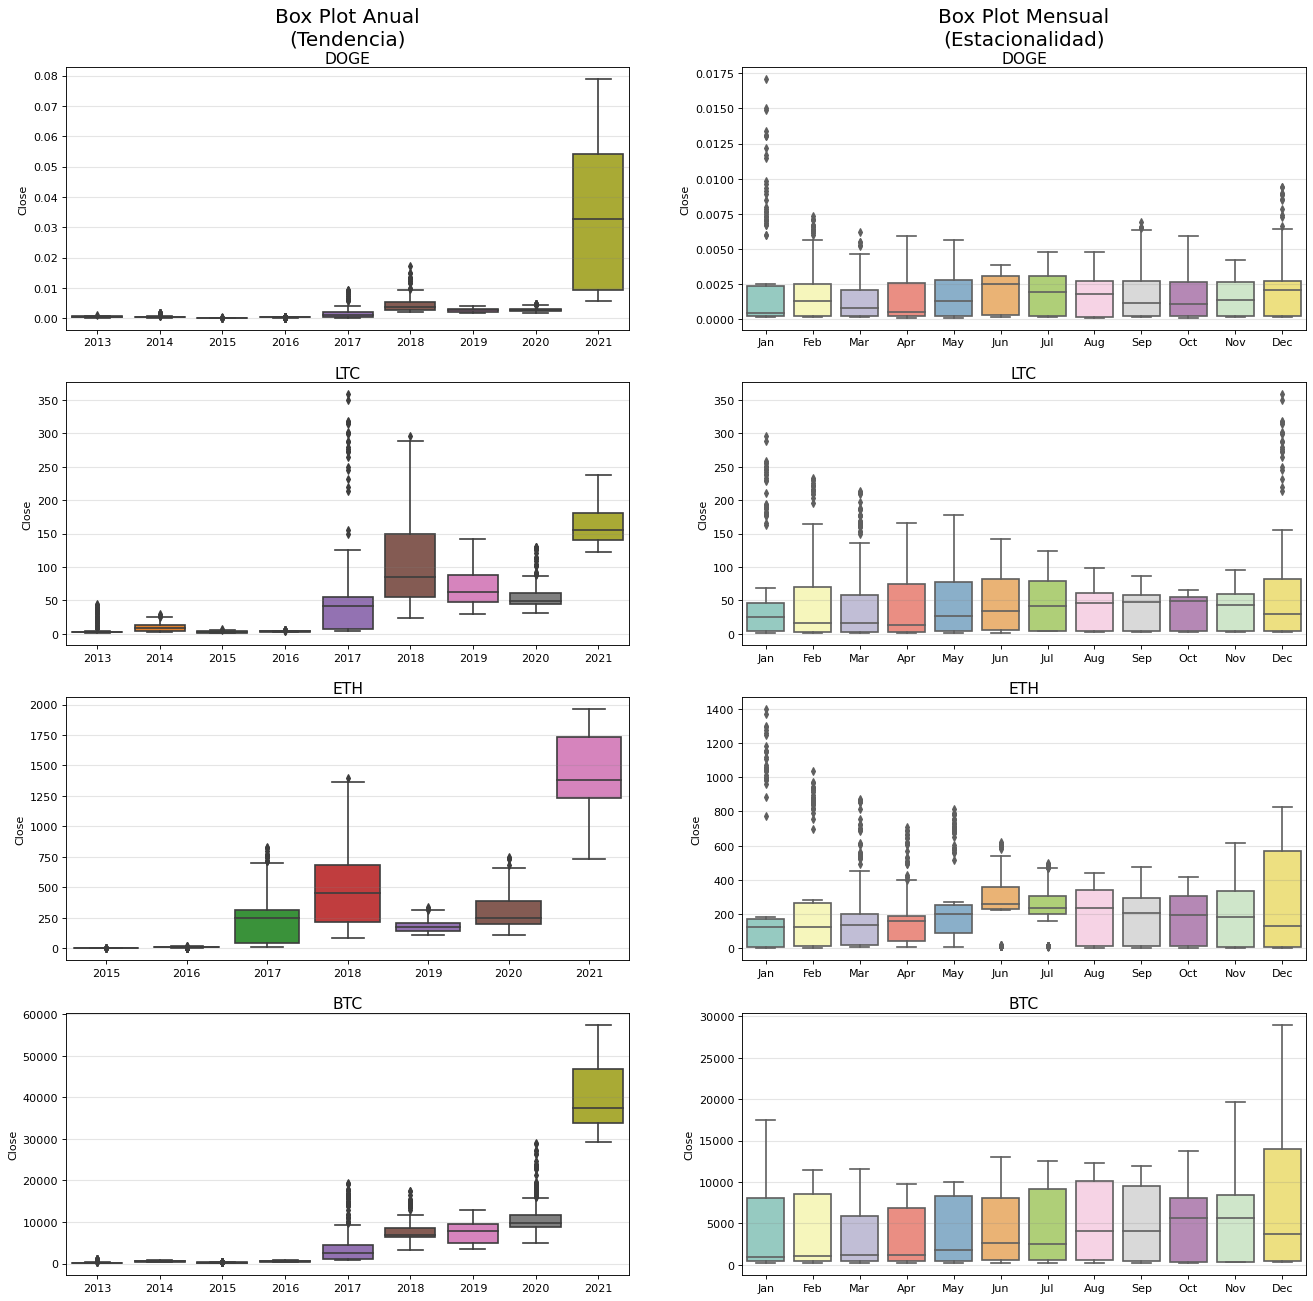

In [18]:
doge = pd.DataFrame(cryptos[cryptos.Symbol == "DOGE"])
doge['Month'] = [d.strftime('%b') for d in doge.Date]
years_doge = doge['Year'].unique()

ltc = cryptos[cryptos.Symbol == "LTC"]
ltc['Month'] = [d.strftime('%b') for d in ltc.Date]
years_ltc = ltc['Year'].unique()

eth = cryptos[cryptos.Symbol == "ETH"]
eth['Month'] = [d.strftime('%b') for d in eth.Date]
years_eth = eth['Year'].unique()

btc = cryptos[cryptos.Symbol == "BTC"]
btc['Month'] = [d.strftime('%b') for d in btc.Date]
years_btc = btc['Year'].unique()

fig, axes = plt.subplots(4, 2, figsize = (20,20), dpi = 80)



box = sns.boxplot(x ='Year', y ='Close', data = doge, ax = axes[0, 0])
axes[0, 0].xaxis.set_label_position('top')
axes[0, 0].set_xlabel('DOGE', fontsize= 14)
axes[0, 0].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

sns.boxplot(x ='Month', y ='Close', data = doge.loc[~doge.Year.isin([2013, 2021]), :], ax = axes[0, 1], palette ='Set3')
axes[0, 1].xaxis.set_label_position('top')
axes[0, 1].set_xlabel('DOGE', fontsize= 14)
axes[0, 1].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

sns.boxplot(x ='Year', y ='Close', data = ltc, ax = axes[1, 0])
axes[1, 0].xaxis.set_label_position('top')
axes[1, 0].set_xlabel('LTC', fontsize= 14)
axes[1, 0].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

sns.boxplot(x ='Month', y ='Close', data = ltc.loc[~ltc.Year.isin([2013, 2021]), :], ax = axes[1, 1], palette ='Set3')
axes[1, 1].xaxis.set_label_position('top')
axes[1, 1].set_xlabel('LTC', fontsize= 14)
axes[1, 1].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

sns.boxplot(x ='Year', y ='Close', data = eth, ax = axes[2, 0])
axes[2, 0].xaxis.set_label_position('top')
axes[2, 0].set_xlabel('ETH', fontsize= 14)
axes[2, 0].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

sns.boxplot(x ='Month', y ='Close', data = eth.loc[~eth.Year.isin([2013, 2021]), :], ax = axes[2, 1], palette ='Set3',
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[2, 1].xaxis.set_label_position('top')
axes[2, 1].set_xlabel('ETH', fontsize= 14)
axes[2, 1].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

sns.boxplot(x ='Year', y ='Close', data = btc, ax = axes[3, 0])
axes[3, 0].xaxis.set_label_position('top')
axes[3, 0].set_xlabel('BTC', fontsize= 14)
axes[3, 0].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

sns.boxplot(x ='Month', y ='Close', data = btc.loc[~btc.Year.isin([2013, 2021]), :], ax = axes[3, 1], palette ='Set3')
axes[3, 1].xaxis.set_label_position('top')
axes[3, 1].set_xlabel('BTC', fontsize= 14)
axes[3, 1].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)


#Seteamos los títulos:
axes[0, 0].set_title('Box Plot Anual\n(Tendencia)', fontsize=18); 
axes[0, 1].set_title('Box Plot Mensual\n(Estacionalidad)', fontsize=18);

plt.savefig('boxplots.png')

- Al analizar la tendencia, se puede observar que es claramente alcista a lo largo de la corta historia


- Al analizar la estacionalidad, se pueden observar algunos puntos:

1) Hay muy pocos bigotes inferiores debido a la naturaleza alcista de la tendencia.

2) Un cierto aumento en los valores de fin y principio de año (dentro del rango intercuartil en BTC, mediante outliers en ETH, LTC y DOGE).

3) Una diferente volatilidad entre los distintos clusters: DOGE tiene cuerpo del boxplot menor a LTC, quien a su vez tiene menor cuerpo de boxplot que ETH, e igualmente con BTC. A su vez, la relación de tamaño entre bigotes y cuerpo son directamente proporcionales a la volatilidad: DOGE, el más volátil, tiene bigotes mucho más grandes proporcionalmente al cuerpo, en comparación a las monedas menos volatiles. Esto se da, nuevamente, de manera gradual.

4) La enorme diferencia en Volatilidad y en Marketcap de BTC, el único en el cluster 3, podría explicar por qué no tuvo ningún outlier.

#### Plots para visualizar el valor de cierre y la volatilidad a lo largo de los años

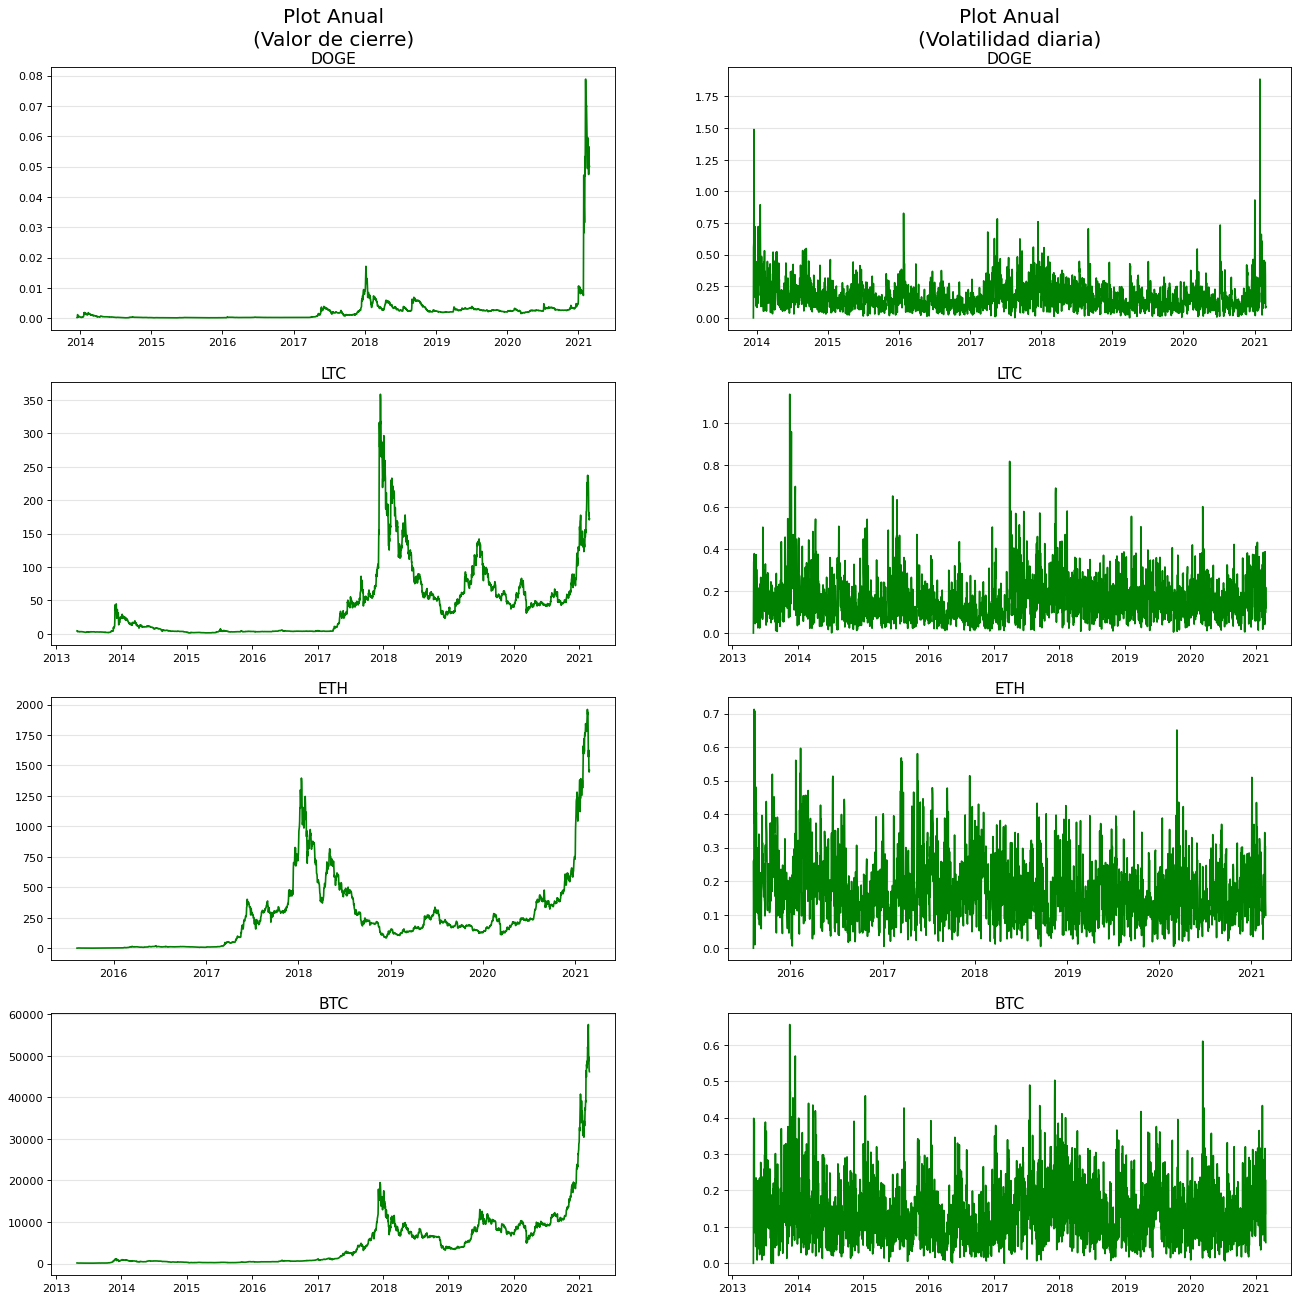

In [31]:
fig2, axes2 = plt.subplots(4, 2, figsize = (20,20), dpi = 80)

axes2[0, 0].plot(doge["Date"], doge["Close"], color='g')
axes2[0, 0].xaxis.set_label_position('top')
axes2[0, 0].set_xlabel('DOGE', fontsize= 14)
axes2[0, 0].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

axes2[0, 1].plot(doge["Date"], doge["Volatilidad"], color='g')
axes2[0, 1].xaxis.set_label_position('top')
axes2[0, 1].set_xlabel('DOGE', fontsize= 14)
axes2[0, 1].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

axes2[1, 0].plot(ltc["Date"], ltc["Close"], color='g')
axes2[1, 0].xaxis.set_label_position('top')
axes2[1, 0].set_xlabel('LTC', fontsize= 14)
axes2[1, 0].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

axes2[1, 1].plot(ltc["Date"], ltc["Volatilidad"], color='g')
axes2[1, 1].xaxis.set_label_position('top')
axes2[1, 1].set_xlabel('LTC', fontsize= 14)
axes2[1, 1].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)


axes2[2, 0].plot(eth["Date"], eth["Close"], color='g')
axes2[2, 0].xaxis.set_label_position('top')
axes2[2, 0].set_xlabel('ETH', fontsize= 14)
axes2[2, 0].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

axes2[2, 1].plot(eth["Date"], eth["Volatilidad"], color='g')
axes2[2, 1].xaxis.set_label_position('top')
axes2[2, 1].set_xlabel('ETH', fontsize= 14)
axes2[2, 1].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)


axes2[3, 0].plot(btc["Date"], btc["Close"], color='g')
axes2[3, 0].xaxis.set_label_position('top')
axes2[3, 0].set_xlabel('BTC', fontsize= 14)
axes2[3, 0].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)

axes2[3, 1].plot(btc["Date"], btc["Volatilidad"], color='g')
axes2[3, 1].xaxis.set_label_position('top')
axes2[3, 1].set_xlabel('BTC', fontsize= 14)
axes2[3, 1].grid(which='major', axis='y', color='gray', lw=1, alpha=0.2)


#Seteamos los títulos:
axes2[0, 0].set_title('Plot Anual\n(Valor de cierre)', fontsize=18); 
axes2[0, 1].set_title('Plot Anual\n(Volatilidad diaria)', fontsize=18);

plt.savefig('plots.png')

Se realizará en otra notebook un análisis más exhaustivo de series de tiempo basadas en BTC.